In [3]:
import numpy as np
from random import random
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression
from scipy.special import expit
import pandas as pd

In [4]:

data={
    'exame1':[],
    'exame2':[],
    'aprovado':[]
    }


for i  in range(5000):
   nota=[random()*100,random()*100]
   data['exame1'].append(nota[0])
   data['exame2'].append(nota[1])
   if np.array([nota[0],nota[1]]).mean()>=60:
    data['aprovado'].append(1)
   else:
    data['aprovado'].append(0)



In [5]:
df = pd.DataFrame(data)
df.head()

,exame1,exame2,aprovado
0,91.057268,43.552957,1
1,12.291292,85.595115,0
2,74.674724,21.362275,0
3,86.714060,83.842882,1
4,84.745965,94.743459,1


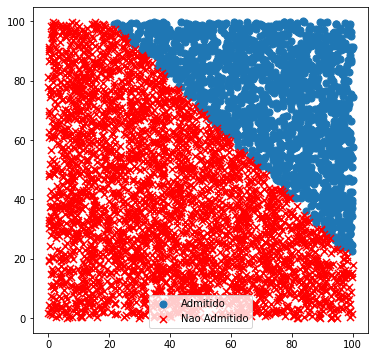

In [6]:
positive = df[df['aprovado'].isin([1])]
negative = df[df['aprovado'].isin([0])]


fig,ax=plt.subplots(figsize=(6,6))

ax.scatter(positive['exame1'],positive['exame2'],s=50,label='Admitido')
ax.scatter(negative['exame1'],negative['exame2'],s=50,c='r',marker='x',label='Nao Admitido')

plt.legend()
plt.show()

In [7]:
y=df.aprovado
X=np.array(df.drop('aprovado',1))

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [9]:

model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [10]:
model.score(X_test,y_test)

0.9992

In [11]:
t=np.array([[100,20]])

pred=model.predict(t)
if pred[0]==0:
  result='Reprovado'
else:
  result='Aprovado'
print ('aluno foi:',result,'Com nota Media de:',int(t.mean()),'pontos')

aluno foi: Aprovado Com nota Media de: 60 pontos
